# Dog breeds classification project
#### Author: Marusic Diana

This experiment aims to solve the problem of Dog Breed classification and Longevity prediction based on recorded features as weight, height, energy level, and other features. A dataset of 1000 samples with missing values for the height feature will be used. The features are stored as floating point numerical values and categorical values.

The first part of this experiment is to design and select the best model for predicting Dog breed names using Logistic Regression, Random Forests and KNN classification algorithms with different hyperparameters.

The second part of the experiment consists in using regression to predict Longevity using the same features, except Dog Breed Name. The algorithms that will be used are Linear Regression and KNN Regression.

## Problem statement

## Import libraries

In [577]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
from io import StringIO   # StringIO behaves like a file object
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import explained_variance_score, mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import HTML, display


In [508]:
# check python version
# import sys
# sys.version

Define and initialize some constants

In [509]:
######################################
###  CONSTANTS 
######################################
FILE_NAME = "Marusic_I_Diana_train.csv"

ALL_FEATURES = ["Breed Name","Weight(g)","Height(cm)","Longevity(yrs)",
    "Energy level", "Attention Needs", "Coat Lenght", "Sex",
    "Owner Name"]

COLUMN_NAMES = ["Breed Name","Weight(g)","Height(cm)","Longevity(yrs)",
    "Energy level", "Attention Needs", "Coat Lenght", "Sex",
    "Owner Name"]

SELECTED_FEATURES_BREED = ["Weight(g)","Height(cm)", "Energy level", "Attention Needs", "Coat Lenght", "Sex"];


breed_tags = {}
breeds = []


## Read data from csv file

In [510]:
data = pd.read_csv(FILE_NAME)
print(data)

print(data.describe())

         Breed Name   Weight(g)  Height(cm)  Longevity(yrs) Energy level  \
0    Bearded Collie  22280.5964     54.3216         13.1931         high   
1        Great Dane  51407.2976     76.6582          6.3828         high   
2    Bearded Collie  22122.0794     51.1220         12.0584          med   
3         Daschhund   6234.2029     21.4468         13.2225         high   
4    Bearded Collie  18103.0403     54.3006         12.6288         high   
5         Daschhund  10843.0668     21.1785         13.2595          med   
6        Great Dane  49810.6146         NaN          6.3221          med   
7         Daschhund  10333.2284     19.9325         12.6203         high   
8    Bearded Collie  26618.0765     54.2249         12.4848         high   
9        Great Dane  53354.6487     82.7296          6.7679         high   
10       Great Dane  50098.9062     79.9508          6.7008          low   
11        Dalmatian  20409.6415     48.0000         12.3616         high   
12       Gre

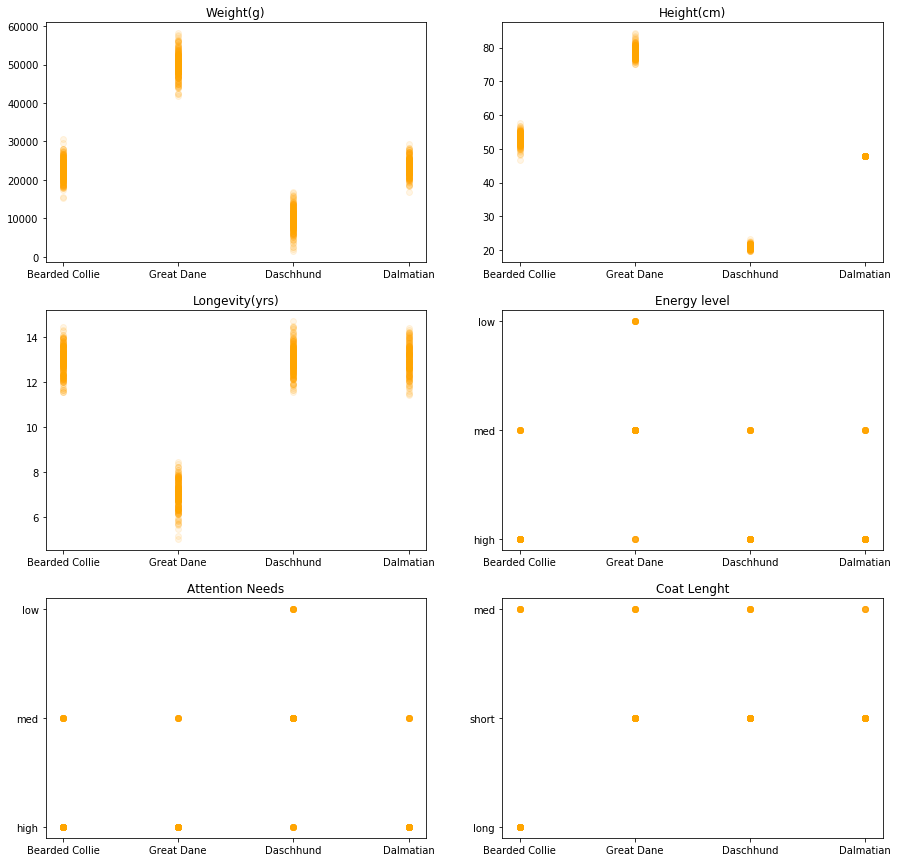

In [511]:


columns = ["Breed Name","Weight(g)","Height(cm)","Longevity(yrs)",
    "Energy level", "Attention Needs", "Coat Lenght", "Sex",
    "Owner Name"]

fig = plt.figure(figsize=(15, 15))
((p1,p2), (p3,p4), (p5,p6)) = fig.subplots(3,2)

# Save breed_names in a variable
breed_names = data.iloc[:, 0]


for i in range(1, 7):
        locals()['p'+str(i)].scatter(breed_names,data.iloc[:,i],alpha = 0.1, color="orange")
        locals()['p'+str(i)].set_title(data.columns[i])

### Remove columns that do not represent features (Owner name)

In [512]:
data = data.drop("Owner Name", axis=1)
print(data)

         Breed Name   Weight(g)  Height(cm)  Longevity(yrs) Energy level  \
0    Bearded Collie  22280.5964     54.3216         13.1931         high   
1        Great Dane  51407.2976     76.6582          6.3828         high   
2    Bearded Collie  22122.0794     51.1220         12.0584          med   
3         Daschhund   6234.2029     21.4468         13.2225         high   
4    Bearded Collie  18103.0403     54.3006         12.6288         high   
5         Daschhund  10843.0668     21.1785         13.2595          med   
6        Great Dane  49810.6146         NaN          6.3221          med   
7         Daschhund  10333.2284     19.9325         12.6203         high   
8    Bearded Collie  26618.0765     54.2249         12.4848         high   
9        Great Dane  53354.6487     82.7296          6.7679         high   
10       Great Dane  50098.9062     79.9508          6.7008          low   
11        Dalmatian  20409.6415     48.0000         12.3616         high   
12       Gre

Update breed name and remove breed name column from data

### Transform non-numerical data to numerical

I use map functions for all values of type "low", "medium" and "heigh", because the order counts.
While for breed names, the order of numeric labels doesn't count, that's why I use scikit learn LabelEncoder.

In [513]:
data['Energy level'] = data['Energy level'].map( {'low':0, 'med':1, 'high':2})
data['Attention Needs'] = data['Attention Needs'].map( {'low':0, 'med':1, 'high':2})
data['Coat Lenght'] = data['Coat Lenght'].map( {'short':0, 'med':1, 'long':2})
data['Sex'] = data['Sex'].map( {'female':0, 'male':1})


# Update breed names


# data['Breed Name'] = data.iloc[:, 0]
print(data["Breed Name"])
le = preprocessing.LabelEncoder()
le.fit(data["Breed Name"])
# print(le.classes_)
data["Breed Name"] = le.transform(data["Breed Name"]) 
# print(data["Breed Name"])


print(data)

0      Bearded Collie
1          Great Dane
2      Bearded Collie
3           Daschhund
4      Bearded Collie
5           Daschhund
6          Great Dane
7           Daschhund
8      Bearded Collie
9          Great Dane
10         Great Dane
11          Dalmatian
12         Great Dane
13          Daschhund
14     Bearded Collie
15         Great Dane
16          Dalmatian
17          Daschhund
18          Dalmatian
19          Daschhund
20          Daschhund
21          Dalmatian
22     Bearded Collie
23          Dalmatian
24          Daschhund
25     Bearded Collie
26          Daschhund
27          Dalmatian
28          Daschhund
29         Great Dane
            ...      
970         Daschhund
971         Daschhund
972         Daschhund
973    Bearded Collie
974         Daschhund
975         Daschhund
976    Bearded Collie
977        Great Dane
978    Bearded Collie
979         Daschhund
980         Daschhund
981         Daschhund
982        Great Dane
983    Bearded Collie
984       

### Process rows containing NaN

In [514]:
# # Trying to use SimpleImputer
# def handleMissing(data):
#     # Available strategies: mean, median, most_frequent, constant
# #     imp = SimpleImputer(missing_values=np.nan, strategy='mean')
# #     imp.fit(data)  
#     imp = SimpleImputer(strategy="mean")
#     result = imp.fit_transform(data)
#     return result


### Filling missing values for the height columns with mean value

For handling missing values in the height column, the mean value for height column will be used to replace nan values.

In [515]:
# print(data)

data = data.fillna(data.mean()['Height(cm)'])
# data = data.fillna(data.mean())

# # Another possible strategy - drop rows with nan, but not so effective
# # data = data.dropna()

# print(data)


## Plot data again to see differences

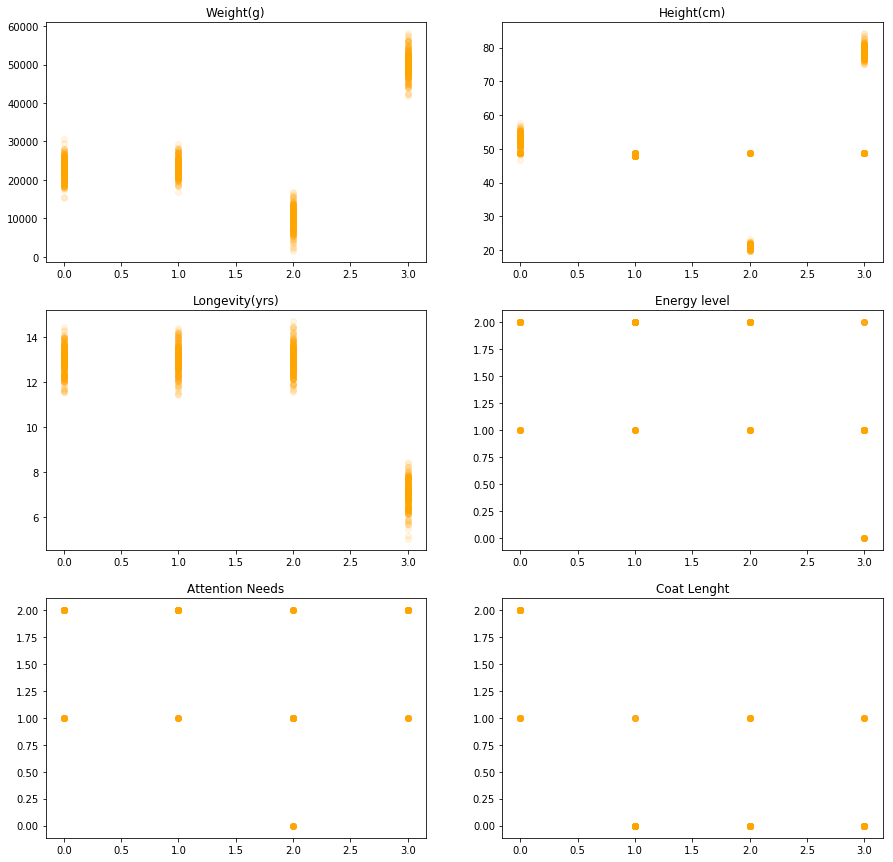

In [516]:


columns = ["Breed Name","Weight(g)","Height(cm)","Longevity(yrs)",
    "Energy level", "Attention Needs", "Coat Lenght", "Sex",
    "Owner Name"]

fig = plt.figure(figsize=(15, 15))
((p1,p2), (p3,p4), (p5,p6)) = fig.subplots(3,2)

# Save breed_names in a variable
breed_names = data.iloc[:, 0]


for i in range(1, 7):
        locals()['p'+str(i)].scatter(breed_names,data.iloc[:,i],alpha = 0.1, color="orange")
        locals()['p'+str(i)].set_title(data.columns[i])

## Get breed names updated

In [517]:
breed_names = data["Breed Name"]

##  Get longevities to use later in task 2

In [518]:
longevities = data["Longevity(yrs)"]

## Drop breed name  and longevity columns

In [519]:
data = data.drop("Breed Name", axis=1)
data = data.drop("Longevity(yrs)", axis=1)
print(data)

      Weight(g)  Height(cm)  Energy level  Attention Needs  Coat Lenght  Sex
0    22280.5964   54.321600             2                2            2    1
1    51407.2976   76.658200             2                2            0    0
2    22122.0794   51.122000             1                2            1    0
3     6234.2029   21.446800             2                1            1    0
4    18103.0403   54.300600             2                2            2    0
5    10843.0668   21.178500             1                0            1    0
6    49810.6146   48.801252             1                2            0    1
7    10333.2284   19.932500             2                1            0    1
8    26618.0765   54.224900             2                2            2    1
9    53354.6487   82.729600             2                2            0    0
10   50098.9062   79.950800             0                2            0    1
11   20409.6415   48.000000             2                2            0    0

# First task - predict dog breed names

## Split data train into training, test and validation

In [549]:
# Split data into train set and test set
X_data, X_test, y_data, y_test = train_test_split(data, breed_names)

# Using KFold to further split training data into train and validation
kf = KFold(n_splits=2)

for train_index, validation_index in kf.split(X_data):
    X_train, X_validation = X_data.iloc[train_index], X_data.iloc[validation_index]
    y_train, y_validation = y_data.iloc[train_index], y_data.iloc[validation_index]


## Initialize Hyper Parameters for each model

In [550]:
lp = [
    [
        {'solver': 'lbfgs', 'multi_class':'auto', 'max_iter': 5000},  #LogisticRegression
        { 'solver': 'liblinear', 'multi_class':'auto', 'max_iter': 5000},  #LogisticRegression
        {'solver': 'saga', 'multi_class':'auto', 'max_iter': 5000},  #LogisticRegression
        { 'solver': 'sag', 'multi_class':'auto', 'max_iter': 5000},  #LogisticRegression
        {'solver': 'newton-cg', 'multi_class':'auto', 'max_iter': 5000},  #LogisticRegression
    ],
    [ 
        {'n_estimators': 1, 'max_depth':100, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 2, 'max_depth':100, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 3, 'max_depth':100, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 4, 'max_depth':100, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 10, 'max_depth':100, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 20, 'max_depth':100, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 10, 'max_depth':1000, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 20, 'max_depth':1000, 'max_leaf_nodes': 1000}, #RandomForestClassifier
        {'n_estimators': 3, 'max_depth':1000, 'max_leaf_nodes': 1000}, #RandomForestClassifier
    ],
    [
        {'n_neighbors': 5, 'leaf_size': 10, 'algorithm': 'ball_tree'}, #KNeightborsClassifier
        {'n_neighbors': 5, 'leaf_size': 10, 'algorithm': 'kd_tree'}, #KNeightborsClassifier
        {'n_neighbors': 10, 'leaf_size': 100, 'algorithm': 'ball_tree'}, #KNeightborsClassifier
        {'n_neighbors': 10, 'leaf_size': 100, 'algorithm': 'kd_tree'}, #KNeightborsClassifier
        {'n_neighbors': 20, 'leaf_size': 1000, 'algorithm': 'ball_tree'}, #KNeightborsClassifier
        {'n_neighbors': 20, 'leaf_size': 1000, 'algorithm': 'kd_tree'} #KNeightborsClassifier
    ]    
]


## Training process and results saving

Begin training with each model and each hyperparameter set defined for each model. Also, calculate performance metrics as accuracy, f1 score, precision, recall and save them in arrays.

In [551]:
# Initialize some arrays to store metrics data for later printing
nr_models = 3

accuracies = []
accuracies.append([])
accuracies.append([])
accuracies.append([])
precisions = []
precisions.append([])
precisions.append([])
precisions.append([])
recalls = []
recalls.append([])
recalls.append([])
recalls.append([])
models = []
models.append([])
models.append([])
models.append([])
f1s = []
f1s.append([])
f1s.append([])
f1s.append([])
model_names = ["Logistic Regression", "Random Forest Classifier", "KNN"]


for j, Model in enumerate([LogisticRegression, RandomForestClassifier, KNeighborsClassifier]):
    
    for i in range(0, len(lp[j])):
        clf = Model(**lp[j][i]);
        print(clf)
        models[j].append(clf)
        
        clf.fit(X_train, y_train)

#         Predict on validation set
        y_pred = clf.predict(X_validation)

#         Transform classes to integer
        y_pred = y_pred.astype(int)

#         print(y_validation)
#         print(y_pred)


        accuracy = accuracy_score(y_validation, y_pred)
        f1 = f1_score(y_validation, y_pred, average="weighted")
        precision = precision_score(y_validation, y_pred, average="weighted")
        recall = recall_score(y_validation, y_pred, average="weighted")
        print("-----accuracy score:-----")
        print(accuracy)
        accuracies[j].append(accuracy)
#         print(accuracies)
#         print(accuracies[j])
        
        print("-----f1 score:-----")
        print(f1)
        f1s[j].append(f1)
        
        print("-----precision score:-----")
        print(precision)
        precisions[j].append(precision)
        
        print("-----recall score:-----")
        print(recall)
        recalls[j].append(recall)
        
    #   new line
        print()


    #     pd.get_dummies
    #     target_names=["col0", "col1", "col2", "col3"]
    #     classification_report(y_test, y_pred, target_names=target_names)
        print(classification_report(y_validation, y_pred))
        kfold = KFold(n_splits=3, random_state=7)
        result = cross_val_score(clf, X_validation, y_validation, cv=kfold, scoring='accuracy')
        print(result)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
-----accuracy score:-----
0.944
-----f1 score:-----
0.9439082033740612
-----precision score:-----
0.9462684168121908
-----recall score:-----
0.944

              precision    recall  f1-score   support

           0       0.91      0.97      0.94       104
           1       0.93      0.94      0.93        94
           2       1.00      0.89      0.94        98
           3       0.95      0.99      0.97        79

   micro avg       0.94      0.94      0.94       375
   macro avg       0.95      0.95      0.95       375
weighted avg       0.95      0.94      0.94       375

[0.968 0.984 0.936]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_cl

/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision'

-----accuracy score:-----
0.21066666666666667
-----f1 score:-----
0.07530618401206636
-----precision score:-----
0.04584756657483931
-----recall score:-----
0.21066666666666667

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00        98
           3       0.22      1.00      0.36        79

   micro avg       0.21      0.21      0.21       375
   macro avg       0.05      0.25      0.09       375
weighted avg       0.05      0.21      0.08       375



/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[0.184 0.224 0.224]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='sag',
          tol=0.0001, verbose=0, warm_start=False)


/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision'

-----accuracy score:-----
0.21066666666666667
-----f1 score:-----
0.07795160031225604
-----precision score:-----
0.04782375478927203
-----recall score:-----
0.21066666666666667

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       104
           1       0.00      0.00      0.00        94
           2       0.00      0.00      0.00        98
           3       0.23      1.00      0.37        79

   micro avg       0.21      0.21      0.21       375
   macro avg       0.06      0.25      0.09       375
weighted avg       0.05      0.21      0.08       375



/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[0.184 0.224 0.224]
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)


-----accuracy score:-----
0.9946666666666667
-----f1 score:-----
0.9946688468744677
-----precision score:-----
0.9947777777777776
-----recall score:-----
0.9946666666666667

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       104
           1       0.98      1.00      0.99        94
           2       1.00      1.00      1.00        98
           3       1.00      1.00      1.00        79

   micro avg       0.99      0.99      0.99       375
   macro avg       0.99      1.00      0.99       375
weighted avg       0.99      0.99      0.99       375



/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/scipy/optimize/linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/site-packages/scipy/optimize/linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/mdiannna/MachineLearning/Homework/lib/python3.6/si

[0.976 1.    0.992]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=1000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
-----accuracy score:-----
0.968
-----f1 score:-----
0.9679341024750863
-----precision score:-----
0.9680498349834984
-----recall score:-----
0.968

              precision    recall  f1-score   support

           0       0.96      0.93      0.95       104
           1       0.94      0.96      0.95        94
           2       0.99      0.99      0.99        98
           3       0.99      1.00      0.99        79

   micro avg       0.97      0.97      0.97       375
   macro avg       0.97      0.97      0.97       375
weighted avg       0.97      0

[0.984 0.984 0.992]
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=1000, max_features='auto', max_leaf_nodes=1000,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=3, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
-----accuracy score:-----
0.9813333333333333
-----f1 score:-----
0.9813527753292458
-----precision score:-----
0.9814485696895922
-----recall score:-----
0.9813333333333333

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       104
           1       0.97      0.96      0.96        94
           2       1.00      0.99      0.99        98
           3       1.00      1.00      1.00        79

   micro avg       0.98      0.98      0.98       375
   macro avg       0.98      0.98      0.98       375
wei

## Display results

Text format (uncomment next lines to see results in raw text format)

In [552]:
# print(model_names)
# print(accuracies)
# print(f1s)
# print(recalls)
# print(precisions)

# print("Model name", "Accuracy", "F1", "Recall", "Precision")
# for j in range(0, 3):
#     for i in range(0, len(lp[j])):
#         print(model_names[j], accuracies[j][i], f1s[j][i], recalls[j][i], precisions[j][i])

Below HTML is used to display a table containing results for all models used with hyperparameters. The code will automatically color to red the model with hyperparameters having the best accuracy score

In [553]:
from IPython.display import HTML, display

# Build table header
tableHeader = '<tr>'    
for item in ["Nr", "Model name", "Parameters", "Accuracy", "F1", "Recall", "Precision"]:
    tableHeader += '<th>' + item  + '</th>'
tableHeader += '</tr>'

data_rows = ''
nr = 0
best_model_indices = [0, 0, 0]

for j in range(0, nr_models):
    for i in range(0, len(lp[j])):
        data_row = '<tr>'
        
        if accuracies[j][i]==max(accuracies[j]):
            data_row = '<tr style="font-weight:bold; color:red;">'
            best_model_indices[j] = i
        data_row += '<td>' + str(nr) + '</td>'
        data_row += '<td>' + model_names[j] + '</td>'
        data_row += '<td>' + str(lp[j][i]) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(accuracies[j][i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(f1s[j][i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(recalls[j][i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(precisions[j][i]))) + '</td>'
        data_row += '</td>'
        data_rows += data_row
        nr += 1

HTML_code = '<table style="border: 1px solid black">'+tableHeader+ data_rows + '</table>' 

display(HTML(HTML_code))

Nr,Model name,Parameters,Accuracy,F1,Recall,Precision
0,Logistic Regression,"{'solver': 'lbfgs', 'multi_class': 'auto', 'max_iter': 5000}",0.944,0.94391,0.944,0.94627
1,Logistic Regression,"{'solver': 'liblinear', 'multi_class': 'auto', 'max_iter': 5000}",0.80267,0.77926,0.80267,0.85524
2,Logistic Regression,"{'solver': 'saga', 'multi_class': 'auto', 'max_iter': 5000}",0.21067,0.07531,0.21067,0.04585
3,Logistic Regression,"{'solver': 'sag', 'multi_class': 'auto', 'max_iter': 5000}",0.21067,0.07795,0.21067,0.04782
4,Logistic Regression,"{'solver': 'newton-cg', 'multi_class': 'auto', 'max_iter': 5000}",0.99467,0.99467,0.99467,0.99478
5,Random Forest Classifier,"{'n_estimators': 1, 'max_depth': 100, 'max_leaf_nodes': 1000}",0.968,0.96793,0.968,0.96805
6,Random Forest Classifier,"{'n_estimators': 2, 'max_depth': 100, 'max_leaf_nodes': 1000}",0.96,0.96016,0.96,0.96059
7,Random Forest Classifier,"{'n_estimators': 3, 'max_depth': 100, 'max_leaf_nodes': 1000}",0.984,0.98406,0.984,0.9842
8,Random Forest Classifier,"{'n_estimators': 4, 'max_depth': 100, 'max_leaf_nodes': 1000}",0.98133,0.98136,0.98133,0.98167
9,Random Forest Classifier,"{'n_estimators': 10, 'max_depth': 100, 'max_leaf_nodes': 1000}",0.98667,0.98666,0.98667,0.98669


## Plot results

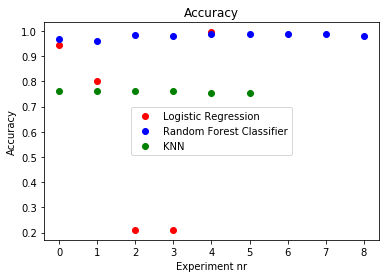

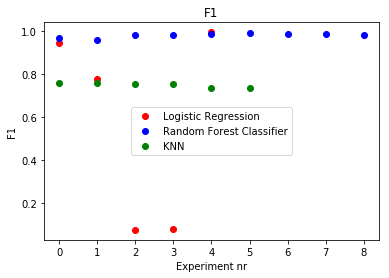

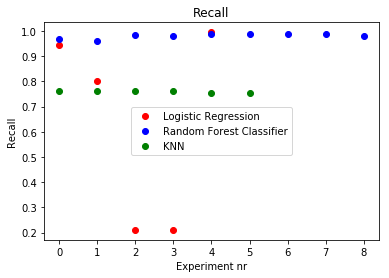

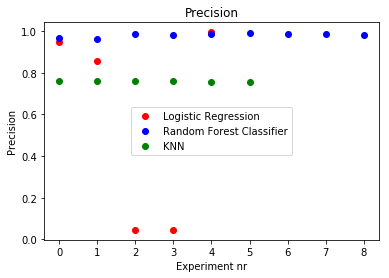

In [554]:
style = ['ro', 'bo', 'go']
for j in range(0, nr_models):
    best_accuracy = accuracies[j]                                
    plt.plot(accuracies[j], style[j], label=model_names[j])
    plt.ylabel("Accuracy")
    plt.xlabel("Experiment nr")
    plt.title("Accuracy")
    plt.legend(loc='center')
plt.show()

for j in range(0, nr_models):
    plt.plot(f1s[j], style[j], label=model_names[j])
    plt.ylabel("F1")
    plt.xlabel("Experiment nr")
    plt.title("F1")
    plt.legend(loc='center')
plt.show()


for j in range(0, nr_models):
    plt.plot(recalls[j], style[j], label=model_names[j])
    plt.ylabel("Recall")
    plt.xlabel("Experiment nr")
    plt.title("Recall")
    plt.legend(loc='center')
plt.show()

for j in range(0, nr_models):
    plt.plot(precisions[j], style[j], label=model_names[j])
    plt.ylabel("Precision")
    plt.xlabel("Experiment nr")
    plt.title("Precision")
    plt.legend(loc='center')
plt.show()

    

## Plot best results for each Model

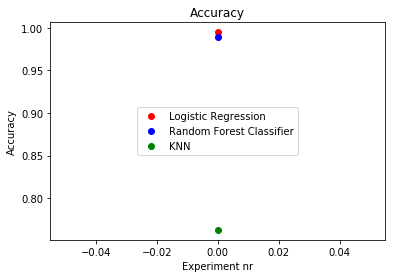

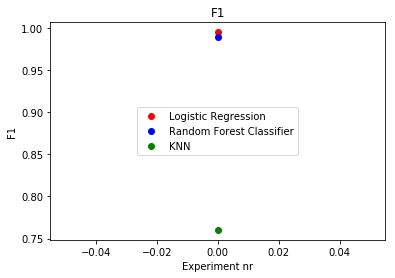

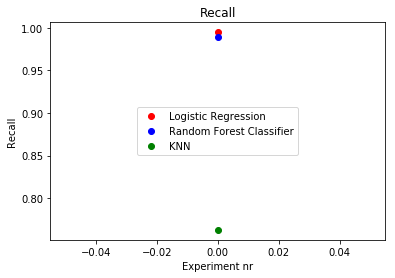

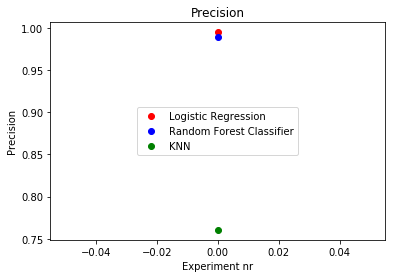

In [556]:
style = ['ro', 'bo', 'go']
for j in range(0, nr_models):
    best_accuracy = accuracies[j]                                
    plt.plot(max(accuracies[j]), style[j], label=model_names[j])
    plt.ylabel("Accuracy")
    plt.xlabel("Experiment nr")
    plt.title("Accuracy")
    plt.legend(loc='center')
plt.show()

for j in range(0, nr_models):
    plt.plot(max(f1s[j]), style[j], label=model_names[j])
    plt.ylabel("F1")
    plt.xlabel("Experiment nr")
    plt.title("F1")
    plt.legend(loc='center')
plt.show()


for j in range(0, nr_models):
    plt.plot(max(recalls[j]), style[j], label=model_names[j])
    plt.ylabel("Recall")
    plt.xlabel("Experiment nr")
    plt.title("Recall")
    plt.legend(loc='center')
plt.show()

for j in range(0, nr_models):
    plt.plot(max(precisions[j]), style[j], label=model_names[j])
    plt.ylabel("Precision")
    plt.xlabel("Experiment nr")
    plt.title("Precision")
    plt.legend(loc='center')
plt.show()

    

## Conclusions for the validation test

Best Model identified for Dog Breed Name classification is logistic regression with newton-cg solver hyperparameter. The accuracy score obained was approx 99%.

Random forest classifier with best hyperparameters performs almost as better as Logistic regression, with an average score of 98%(+-1%).

In 2 of 5 analyzed cases, regression didn't converge even when increasing number of iterations. The solvers used for regression that didn't converge are 'sag' and 'saga'. Therefore, these solvers should not be furhter used for solving this task.

KNN algorithm with the hyperparameters tested has a lower score for this task, obtaining an accuracy result of no more than 75%. 

## FInal results on test set

Using best models for each algorithm to predict on test set (that the models didn't see before) and calculate final metrics.

In [557]:
accuracies_test = []
f1s_test = []
precisions_test = []
recalls_test = []

for j in range(0, nr_models):
    clf = models[j][best_model_indices[j]]
    
    y_pred = clf.predict(X_test)
    
    accuracies_test.append(accuracy_score(y_test, y_pred))
    f1s_test.append(f1_score(y_test, y_pred, average="weighted"))
    precisions_test.append(precision_score(y_test, y_pred, average="weighted"))
    recalls_test.append(recall_score(y_test, y_pred, average="weighted"))

# Uncomment next line to view values for accuracies, f1s, precisions and recalls for the test set
# print(accuracies_test)
# print(f1s_test)
# print(recalls_test)
# print(precisions_test)

## Plot final results

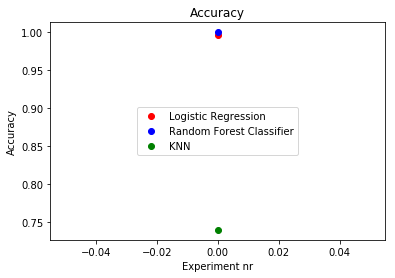

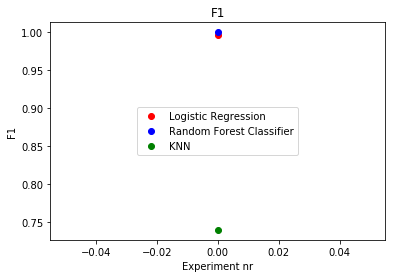

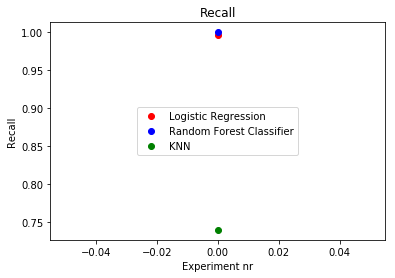

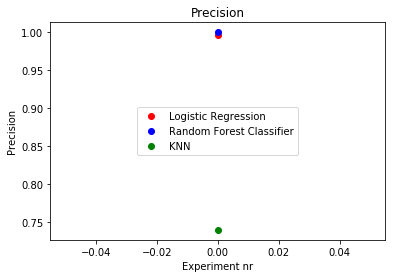

In [559]:
accuracies = accuracies_test
f1s = f1s_test
precisions = precisions_test
recalls = recalls_test

style = ['ro', 'bo', 'go']
for j in range(0, nr_models):
    best_accuracy = accuracies[j]                                
    plt.plot(accuracies[j], style[j], label=model_names[j])
    plt.ylabel("Accuracy")
    plt.xlabel("Experiment nr")
    plt.title("Accuracy")
    plt.legend(loc='center')
plt.show()

for j in range(0, nr_models):
    plt.plot(f1s[j], style[j], label=model_names[j])
    plt.ylabel("F1")
    plt.xlabel("Experiment nr")
    plt.title("F1")
    plt.legend(loc='center')
plt.show()


for j in range(0, nr_models):
    plt.plot(recalls[j], style[j], label=model_names[j])
    plt.ylabel("Recall")
    plt.xlabel("Experiment nr")
    plt.title("Recall")
    plt.legend(loc='center')
plt.show()

for j in range(0, nr_models):
    plt.plot(precisions[j], style[j], label=model_names[j])
    plt.ylabel("Precision")
    plt.xlabel("Experiment nr")
    plt.title("Precision")
    plt.legend(loc='center')
plt.show()

## Display as table

In [561]:

# Build table header
tableHeader = '<tr>'    
for item in ["Nr", "Model name", "Parameters", "Accuracy", "F1", "Recall", "Precision"]:
    tableHeader += '<th>' + item  + '</th>'
tableHeader += '</tr>'

data_rows = ''
nr = 0

for j in range(0, nr_models):
    data_row = '<tr>'
    data_row += '<td>' + str(nr) + '</td>'
    data_row += '<td>' + model_names[j] + '</td>'
    data_row += '<td>' + str(lp[j][best_model_indices[j]]) + '</td>'
    data_row += '<td>' + str(float("{0:.5f}".format(accuracies[j]))) + '</td>'
    data_row += '<td>' + str(float("{0:.5f}".format(f1s[j]))) + '</td>'
    data_row += '<td>' + str(float("{0:.5f}".format(recalls[j]))) + '</td>'
    data_row += '<td>' + str(float("{0:.5f}".format(precisions[j]))) + '</td>'
    data_row += '</td>'
    data_rows += data_row
    nr += 1

HTML_code = '<h1> Final results </h1>'
HTML_code += '<table style="border: 1px solid black">'+tableHeader+ data_rows + '</table>' 

display(HTML(HTML_code))

Nr,Model name,Parameters,Accuracy,F1,Recall,Precision
0,Logistic Regression,"{'solver': 'newton-cg', 'multi_class': 'auto', 'max_iter': 5000}",0.996,0.996,0.996,0.99608
1,Random Forest Classifier,"{'n_estimators': 20, 'max_depth': 100, 'max_leaf_nodes': 1000}",1.0,1.0,1.0,1.0
2,KNN,"{'n_neighbors': 5, 'leaf_size': 10, 'algorithm': 'kd_tree'}",0.74,0.73935,0.74,0.73933


## Conclusions

On test set, the algorithm Random forest Classifier performs better(with 100% accuracy). Logistic regression is almost as good as Random forest Classifier (with 99.6% accuracy) and KNN is far behind (with 74% best accuracy score).

The best 2 models identified for the problem of classification of Dog Breeds are Random Forest classifierwith hyperparameters: number of estimators 20, max depth 100 and max leaf nodes 1000; and Logistic regression with 'newton-cg' solver parameter. 

The performance on the test set is:
- for Logistic Regression: 98-99%(+-1%) accuracy, F1 score 99%(+-1%), recall 99%(+-1%) and precision 99%(+-1%).
- for Random Forest Classifier: 99-100% accuracy, F1 score 99-100%, recall 99-100% and precision 99-100%.

# Second task - regression (predict longevity)

For this task I use same data read from file and with missing values added.

In [308]:
# Print data to be sure it is ok
# print(data)

But first of all, will read and plot raw data to see what features determine the longevity.

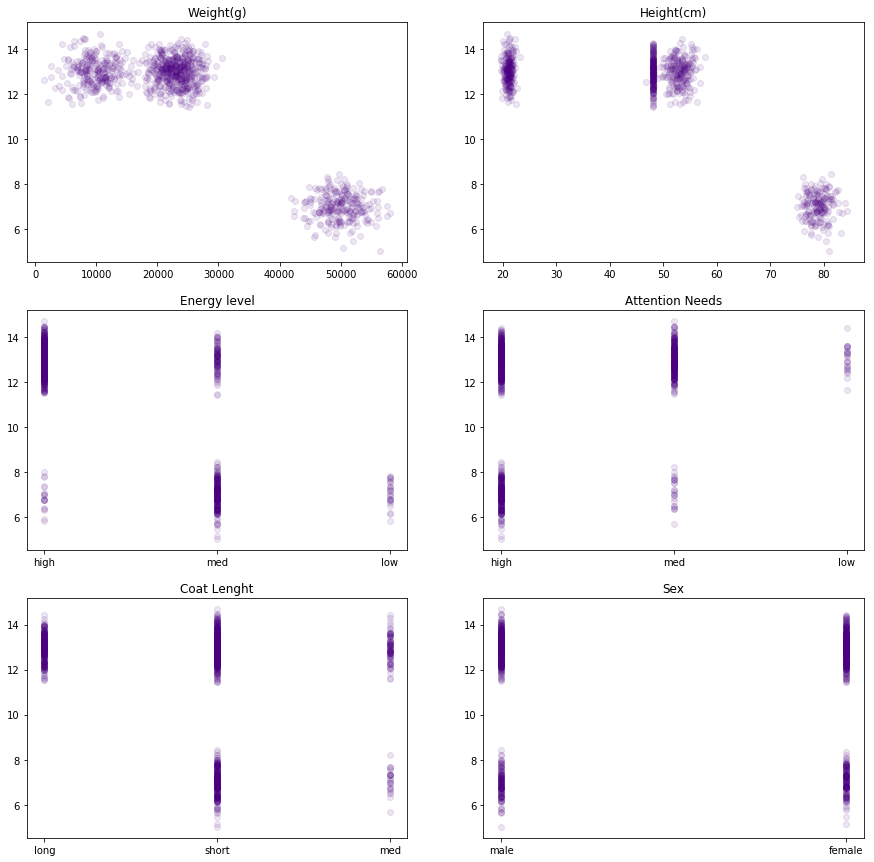

In [562]:
raw_data = pd.read_csv(FILE_NAME)

fig = plt.figure(figsize=(15, 15))
((p1,p2), (p3,p4), (p5,p6)) = fig.subplots(3,2, sharey=False)
# 
# Save longevity in a variable
longevity = raw_data.iloc[:, 3]
# remove longevity column from data
raw_data = raw_data.drop("Longevity(yrs)", axis=1)

for i in range(1, 7):
        locals()['p'+str(i)].scatter(raw_data.iloc[:,i],longevity,alpha = 0.1, color="indigo")
        locals()['p'+str(i)].set_title(raw_data.columns[i])


# Split data into train set and test set

In [571]:
X_data, X_test, y_data, y_test = train_test_split(data, longevities)

# Using KFold to further split training data into train and validation
kf = KFold(n_splits=2)

for train_index, validation_index in kf.split(X_data):
    X_train, X_validation = X_data.iloc[train_index], X_data.iloc[validation_index]
    y_train, y_validation = y_data.iloc[train_index], y_data.iloc[validation_index]

## Initialize parameters for each model

In [565]:
lp = [
    [
        {'normalize': True}, #Linear Regression
        {'normalize': False} #Linear Regression
    ],
    [ 
#         n_neighbors: default 5,    
#         p: 1-manhattan_distance, 2-euclidean_distance, arbitrary - minkowski_distance 
        {'n_neighbors': 3, 'p':1}, #KNNRegressor
        {'n_neighbors': 3, 'p':2}, #KNNRegressor
        {'n_neighbors': 3, 'p':5}, #KNNRegressor
        {'n_neighbors': 5, 'p':1}, #KNNRegressor
        {'n_neighbors': 5, 'p':2}, #KNNRegressor
        {'n_neighbors': 5, 'p':5}, #KNNRegressor
        {'n_neighbors': 10, 'p':1}, #KNNRegressor
        {'n_neighbors': 10, 'p':2}, #KNNRegressor
        {'n_neighbors': 10, 'p':5}, #KNNRegressor
        {'n_neighbors': 20, 'p':1}, #KNNRegressor
        {'n_neighbors': 20, 'p':2}, #KNNRegressor
        {'n_neighbors': 20, 'p':5}, #KNNRegressor
        {'n_neighbors': 30, 'p':1}, #KNNRegressor
        {'n_neighbors': 30, 'p':2}, #KNNRegressor
        {'n_neighbors': 30, 'p':5}, #KNNRegressor
        {'n_neighbors': 50, 'p':1}, #KNNRegressor
        {'n_neighbors': 50, 'p':2}, #KNNRegressor
        {'n_neighbors': 50, 'p':5}, #KNNRegressor
        {'n_neighbors': 60, 'p':1}, #KNNRegressor
        {'n_neighbors': 60, 'p':2}, #KNNRegressor
        {'n_neighbors': 60, 'p':5}, #KNNRegressor
        {'n_neighbors': 75, 'p':1}, #KNNRegressor
        {'n_neighbors': 75, 'p':2}, #KNNRegressor
        {'n_neighbors': 75, 'p':5}, #KNNRegressor
        {'n_neighbors': 80, 'p':1}, #KNNRegressor
        {'n_neighbors': 80, 'p':2}, #KNNRegressor
        {'n_neighbors': 80, 'p':5}, #KNNRegressor
        {'n_neighbors': 90, 'p':1}, #KNNRegressor
        {'n_neighbors': 90, 'p':2}, #KNNRegressor
        {'n_neighbors': 90, 'p':5}, #KNNRegressor
        {'n_neighbors': 100, 'p':1}, #KNNRegressor
        {'n_neighbors': 100, 'p':2}, #KNNRegressor
        {'n_neighbors': 100, 'p':5}, #KNNRegressor

    ],
   
]


## Training process and results saving

In [572]:
# Initialize some arrays to store metrics data for later printing
nr_models = 2

explained_variance_scores = []
explained_variance_scores.append([])
explained_variance_scores.append([])
mean_squared_errors = []
mean_squared_errors.append([])
mean_squared_errors.append([])

models = []
models.append([])
models.append([])

model_names = ["Linear Regression", "KNN"]


for j, Model in enumerate([LinearRegression, KNeighborsRegressor]):
    
    for i in range(0, len(lp[j])):
        clf = Model(**lp[j][i]);
        print(clf)
        models[j].append(clf)
        
        clf.fit(X_train, y_train)

#         Predict on validation set
        y_pred = clf.predict(X_validation)

#         print(y_validation)
#         print(y_pred)

#         Explained variance regression score function
#         Best possible score is 1.0, lower values are worse.
        explained_variance_score_val = explained_variance_score(y_validation, y_pred)

#       Mean squared error - the lower the best
        mean_squared_error_val = mean_squared_error(y_validation, y_pred)
       
        print("-----explained_variance_score score:-----")
        print(explained_variance_score_val)
        explained_variance_scores[j].append(explained_variance_score_val)
        
        
        print("-----mean_squared_error score:-----")
        print(mean_squared_error_val)
        mean_squared_errors[j].append(mean_squared_error_val)
        
        
    #   new line
        print()



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
-----explained_variance_score score:-----
0.852337073672526
-----mean_squared_error score:-----
1.0477698617672466

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
-----explained_variance_score score:-----
0.8523370736725211
-----mean_squared_error score:-----
1.0477698617672804

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=1,
          weights='uniform')
-----explained_variance_score score:-----
0.9389908640755293
-----mean_squared_error score:-----
0.4325190627614814

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')
-----explained_variance_score score:-----
0.938725104319666
-----mean_squared_error score:-----
0.43436713133925914

KNeighborsRegressor(algorithm='auto',

-----mean_squared_error score:-----
0.41405899403348007



## Display results

In [573]:
from IPython.display import HTML, display

# Build table header
tableHeader = '<tr>'    
for item in ["Nr", "Model name", "Parameters", "Explained variance", "Mean squared errors"]:
    tableHeader += '<th>' + item  + '</th>'
tableHeader += '</tr>'

data_rows = ''
nr = 0
best_model_indices = [0, 0, 0]

for j in range(0, nr_models):
    for i in range(0, len(lp[j])):
        data_row = '<tr>'
        
        if explained_variance_scores[j][i]==max(explained_variance_scores[j]):
            data_row = '<tr style="font-weight:bold; color:red;">'
            best_model_indices[j] = i
        data_row += '<td>' + str(nr) + '</td>'
        data_row += '<td>' + model_names[j] + '</td>'
        data_row += '<td>' + str(lp[j][i]) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(explained_variance_scores[j][i]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(mean_squared_errors[j][i]))) + '</td>'
        data_row += '</td>'
        data_rows += data_row
        nr += 1

HTML_code = '<table style="border: 1px solid black">'+tableHeader+ data_rows + '</table>' 

display(HTML(HTML_code))

Nr,Model name,Parameters,Explained variance,Mean squared errors
0,Linear Regression,{'normalize': True},0.85234,1.04777
1,Linear Regression,{'normalize': False},0.85234,1.04777
2,KNN,"{'n_neighbors': 3, 'p': 1}",0.93899,0.43252
3,KNN,"{'n_neighbors': 3, 'p': 2}",0.93873,0.43437
4,KNN,"{'n_neighbors': 3, 'p': 5}",0.93892,0.43303
5,KNN,"{'n_neighbors': 5, 'p': 1}",0.9438,0.39838
6,KNN,"{'n_neighbors': 5, 'p': 2}",0.94352,0.40036
7,KNN,"{'n_neighbors': 5, 'p': 5}",0.94352,0.40036
8,KNN,"{'n_neighbors': 10, 'p': 1}",0.94829,0.36675
9,KNN,"{'n_neighbors': 10, 'p': 2}",0.94828,0.36683


## Plot results

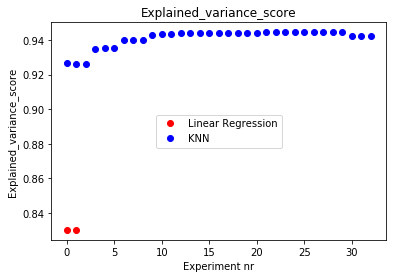

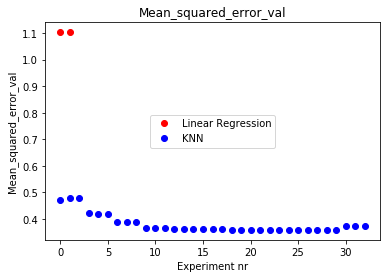

In [501]:
style = ['ro', 'bo', 'go']
for j in range(0, nr_models):
    best_explained_variance_score = explained_variance_scores[j]                                
    
    plt.ylabel("Explained_variance_score")
    plt.title("Explained_variance_score")
    
    plt.plot(explained_variance_scores[j], style[j], label=model_names[j])
    plt.xlabel("Experiment nr")

    plt.legend(loc='center')
plt.show()



for j in range(0, nr_models):
    plt.plot(mean_squared_errors[j], style[j], label=model_names[j])
    plt.ylabel("Mean_squared_error_val")
    plt.xlabel("Experiment nr")
    plt.title("Mean_squared_error_val")
    plt.legend(loc='center')
plt.show()


    

### Let's also analyze the dependency of number of neighbors for the KNN algorithm

Text(0.5, 0, 'Nr of neighbors')

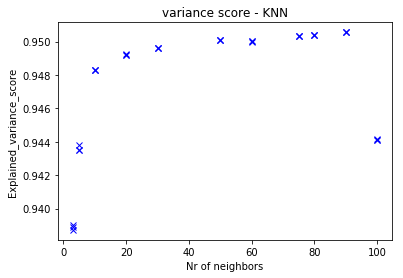

In [574]:
nr_neighbors = []

for i in range(0, len(lp[1])):
    nr_neighbors.append(lp[1][i].get('n_neighbors'))
# print(nr_neighbors)

best_explained_variance_score = explained_variance_scores[1]                                

plt.ylabel("Explained_variance_score")
plt.title("variance score - KNN")

plt.plot(nr_neighbors, explained_variance_scores[j], 'bx', label="KNN")
plt.xlabel("Nr of neighbors")



Conclusion from this plot - best values are aprox 80-90 neighbors hyperparameter for KNN regressor algoritm

## Testing on data unseen before by the algorithm

In [575]:
nr_models = 2

explained_variance_scores = []
# explained_variance_scores.append([])
# explained_variance_scores.append([])
mean_squared_errors = []
# mean_squared_errors.append([])
# mean_squared_errors.append([])


for j in range(0, nr_models):
    clf = models[j][best_model_indices[j]]
    
    y_pred = clf.predict(X_test)
    
    explained_variance_score_val = explained_variance_score(y_test, y_pred)
    mean_squared_error_val = mean_squared_error(y_test, y_pred)

    print("-----explained_variance_score score:-----")
    print(explained_variance_score_val)
    explained_variance_scores.append(explained_variance_score_val)


    print("-----mean_squared_error score:-----")
    print(mean_squared_error_val)
    mean_squared_errors.append(mean_squared_error_val)

-----explained_variance_score score:-----
0.8529577276134577
-----mean_squared_error score:-----
1.046674287585477
-----explained_variance_score score:-----
0.9487870788898145
-----mean_squared_error score:-----
0.36447453658316054


## Final results - display in table

In [576]:
from IPython.display import HTML, display

# Build table header
tableHeader = '<tr>'    
for item in ["Nr", "Model name", "Parameters", "Explained variance", "Mean squared errors"]:
    tableHeader += '<th>' + item  + '</th>'
tableHeader += '</tr>'

data_rows = ''
nr = 0

for j in range(0, nr_models):
        data_row = '<tr>'
        
        data_row += '<td>' + str(nr) + '</td>'
        data_row += '<td>' + model_names[j] + '</td>'
        data_row += '<td>' + str(lp[j][best_model_indices[j]]) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(explained_variance_scores[j]))) + '</td>'
        data_row += '<td>' + str(float("{0:.5f}".format(mean_squared_errors[j]))) + '</td>'
        data_row += '</td>'
        data_rows += data_row
        nr += 1

HTML_code = '<table style="border: 1px solid black">'+tableHeader+ data_rows + '</table>' 

display(HTML(HTML_code))

Nr,Model name,Parameters,Explained variance,Mean squared errors
0,Linear Regression,{'normalize': True},0.85296,1.04667
1,KNN,"{'n_neighbors': 90, 'p': 5}",0.94879,0.36447


## Conclusions

For the regression task and predicting longevity, the Linear Regression and KNN algorithms were used. For the selection of best models, several hyperparameters were used.

For analyzing results, 2 score metrics were used: Explained variance and Mean squared errors. The evaluation is done in the following way: the model with the highest Explained variance (max 1.0) and lower Mean squared errors value (min 0.0) is the best.

The model using LinearRegression algorithm showed a performance of only 0.85 variance score and 1.04 MSE(Mean squared errors).

The results show that the best model is KNN, with the hyperparameter 'nr of neighbors' of 90 proven to be the best. The performance scores obtained on test data is 0.94 variance score and 0.36 MSE(Mean squared errors) score.

